# Exploratory Data Analysis & Intro

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## EDA for all roles

In [7]:
df_plot = df['job_title_short'].value_counts().to_frame()

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


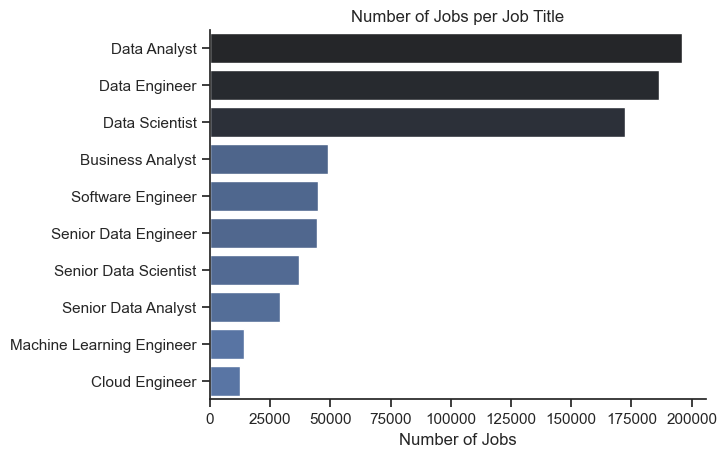

In [4]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style="ticks")
sns.barplot(data = df_plot, x= "count" , y= "job_title_short" , hue= "count" , palette= "dark:b_r" , legend=False )
sns.despine() # to remove those boundaries from right and top
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Countries to Explore

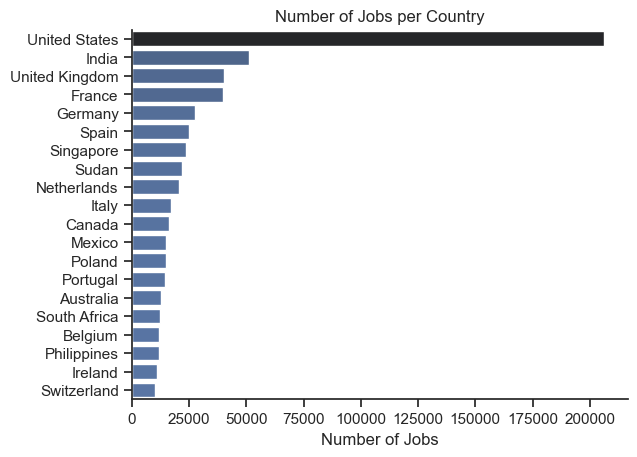

In [8]:
df_country = df["job_country"].value_counts().to_frame().head(20)

sns.set_theme(style="ticks")
sns.barplot(data = df_country, x= "count" , y= "job_country" , hue= "count" , palette= "dark:b_r" , legend=False )
sns.despine() # to remove those boundaries from right and top
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## companies to Explore

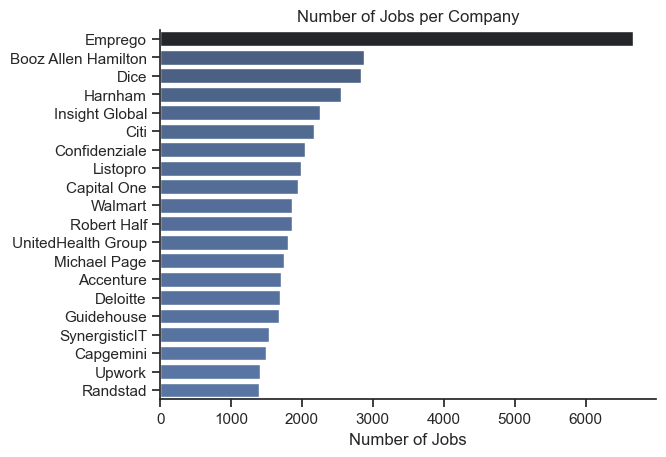

In [9]:
df_company = df["company_name"].value_counts().to_frame().head(20)

sns.set_theme(style="ticks")
sns.barplot(data = df_company, x= "count" , y= "company_name" , hue= "count" , palette= "dark:b_r" , legend=False )
sns.despine() # to remove those boundaries from right and top
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## job criterias 

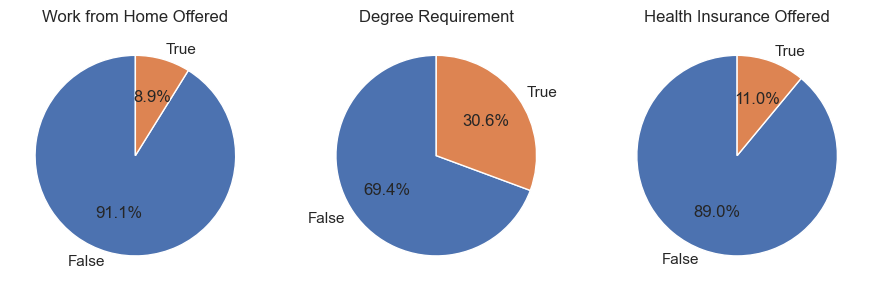

In [14]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

## Exploratory Data Analysis for Data Analysts in the US

### filter for india data analyst roles

In [17]:
df_DA_IND = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()


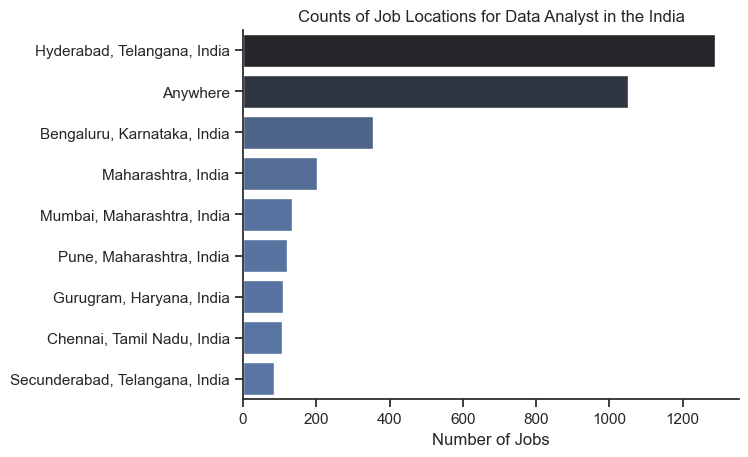

In [24]:
df_ind_loc = df_DA_IND['job_location'].value_counts().head(10).to_frame()[1:]

sns.set_theme(style='ticks')
sns.barplot(data=df_ind_loc, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## job criterias and opportunities

In [32]:
df_DA_IND["job_no_degree_mention"].value_counts()

job_no_degree_mention
False    3934
True     2187
Name: count, dtype: int64

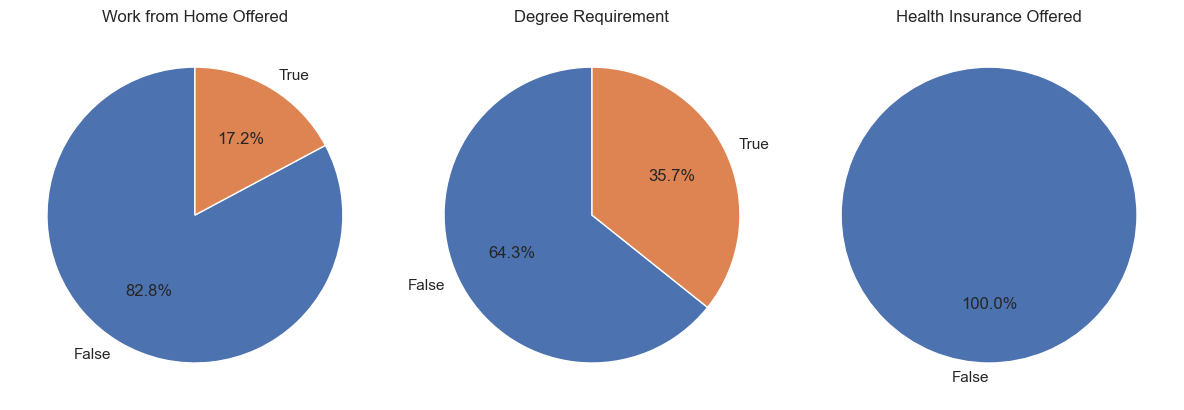

In [33]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}



fig, ax = plt.subplots(1,len(dict_column),  figsize=(12, 5))  # Adjust figsize as needed

for i, (column, title) in enumerate(dict_column.items()):
    labels = df_DA_IND[column].value_counts().index.to_list()  # Get labels from value_counts()
    ax[i].pie(df_DA_IND[column].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

## companies to explore

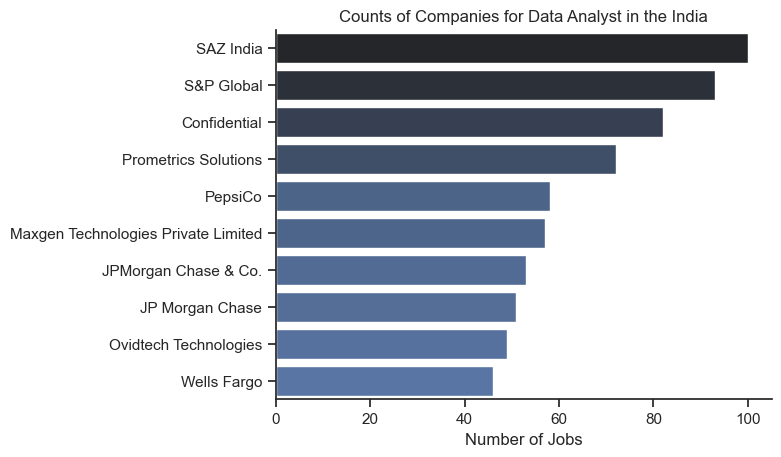

In [34]:
df_company_ind = df_DA_IND['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_company_ind, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()